In [4]:
import pandas as pd
url = 'https://raw.githubusercontent.com/pia222sk20/python_src/refs/heads/main/data/titanic.csv'
titanic = pd.read_csv(url)
titanic = titanic.rename(columns={'Sex':"Gender"})
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


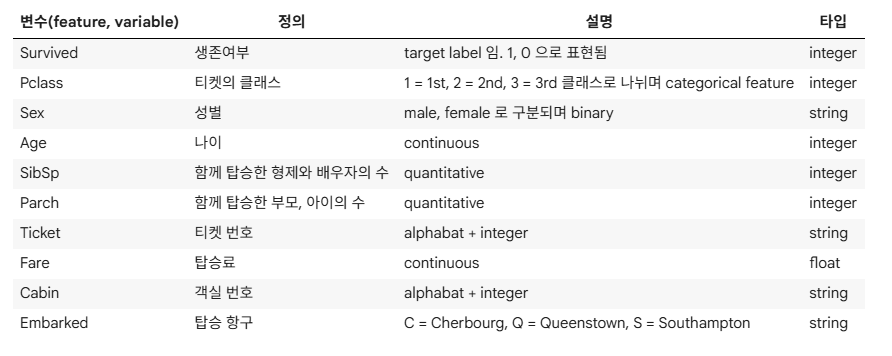

In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
titanic.describe(include='object')

,Name,Gender,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,G6,S
freq,1,577,7,4,644


In [8]:
# null 찾기
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

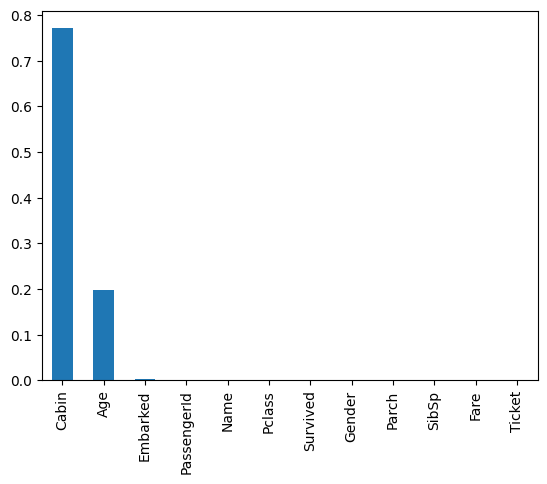

In [9]:
titanic.isna().mean().sort_values(ascending=False).plot(kind='bar')

In [10]:
temp = titanic.isna().mean()
temp[temp>0] #개수가 맞아야 해서? 

Age         0.198653
Cabin       0.771044
Embarked    0.002245
dtype: float64

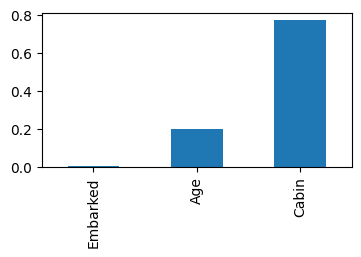

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,2))
temp = titanic.isna().mean()
temp[temp>0].sort_values().plot(kind='bar')
plt.show()

In [12]:
#%pip install missingno

<Axes: >

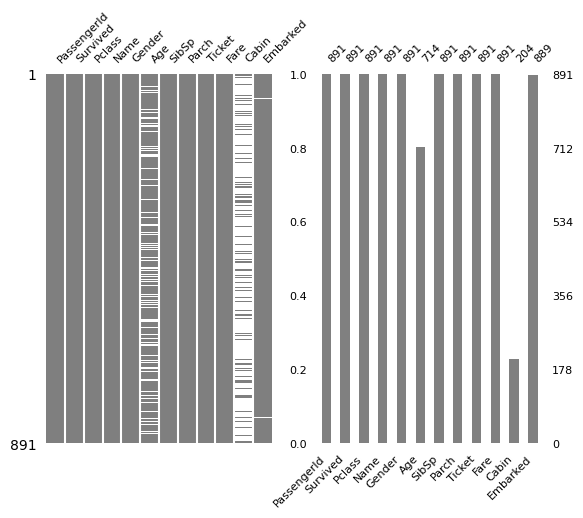

In [13]:
import missingno as msno
fig, axes = plt.subplots(1,2)
msno.matrix(df=titanic, figsize=(4,4), fontsize=8, color=(0.5,0.5,0.5), ax=axes[0], sparkline=False)
msno.bar(df=titanic, figsize=(4,4), fontsize=8, color=(0.5,0.5,0.5), ax=axes[1])

In [14]:
#age컬럼의 결측치가 있는 모든 row 출력
import numpy as np
test = pd.DataFrame({
    'a':[1,np.nan,6,np.nan],
    'b':[2,5,6,np.nan],
    'c':[3,5,9,3]
    })

test[test.isna().any(axis=1)]

,a,b,c
1,NaN,5.0,5
3,NaN,NaN,3


In [15]:
# 타이타닉에 적용
missing_df = titanic[titanic.isna().any(axis=1)]
missing_df

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [16]:
missing_df = titanic[titanic.drop(columns=['Cabin']).isna().any(axis=1)]
missing_df

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [17]:
# Embarked가 결측치인 row 데이터 출력
titanic[titanic.Embarked.isna()]


,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [18]:
# concat으로 하나의 데이터로 만들기
k=3 #중심이 되는 인덱스를 기준으로 앞뒤 3개의 행 함께 확인
df_lsits = [] 
for i in titanic[titanic.Embarked.isna()].index:
    df_lsits.append(titanic.loc[i-k:i+k])

pd.concat(df_lsits)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
58,59,1,2,"West, Miss. Constance Mirium",female,5.00,1,2,C.A. 34651,27.7500,NaN,S
59,60,0,3,"Goodwin, Master. William Frederick",male,11.00,5,2,CA 2144,46.9000,NaN,S
60,61,0,3,"Sirayanian, Mr. Orsen",male,22.00,0,0,2669,7.2292,NaN,C
61,62,1,1,"Icard, Miss. Amelie",female,38.00,0,0,113572,80.0000,B28,NaN
62,63,0,1,"Harris, Mr. Henry Birkhardt",male,45.00,1,0,36973,83.4750,C83,S
63,64,0,3,"Skoog, Master. Harald",male,4.00,3,2,347088,27.9000,NaN,S
64,65,0,1,"Stewart, Mr. Albert A",male,NaN,0,0,PC 17605,27.7208,NaN,C
826,827,0,3,"Lam, Mr. Len",male,NaN,0,0,1601,56.4958,NaN,S
827,828,1,2,"Mallet, Master. Andre",male,1.00,0,2,S.C./PARIS 2079,37.0042,NaN,C
828,829,1,3,"McCormack, Mr. Thomas Joseph",male,NaN,0,0,367228,7.7500,NaN,Q


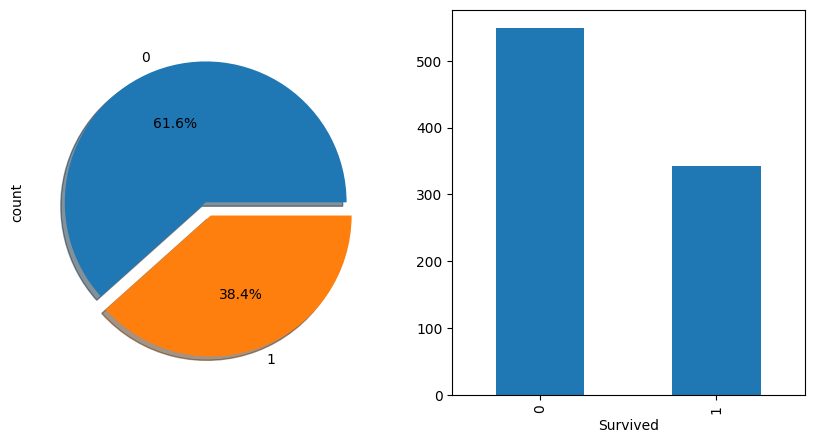

In [19]:
# 생존유무, pie그래프()
f,ax = plt.subplots(1,2,figsize=(10,5))
titanic.Survived.value_counts().plot.pie(autopct='%1.1f%%', shadow=True, explode=[0,0.1], ax=ax[0])
titanic.Survived.value_counts().plot(kind='bar', ax=ax[1] )
plt.show()

In [20]:
# 선실등급별 생존유무
titanic.groupby('Pclass')['Survived'].sum()

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

In [21]:
%pip install jinja2

Note: you may need to restart the kernel to use updated packages.


In [22]:
pd.crosstab(titanic['Pclass'], titanic['Survived'], margins=True).style.background_gradient()

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [23]:
# seaborn
import seaborn as sns

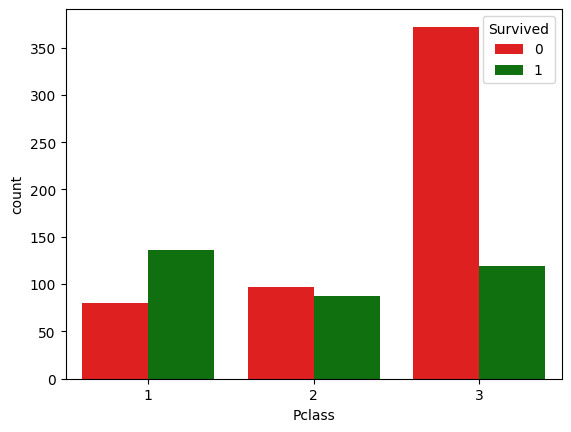

In [37]:
sns.countplot(data=titanic, x='Pclass', hue='Survived', palette=['red','green'])
plt.show()

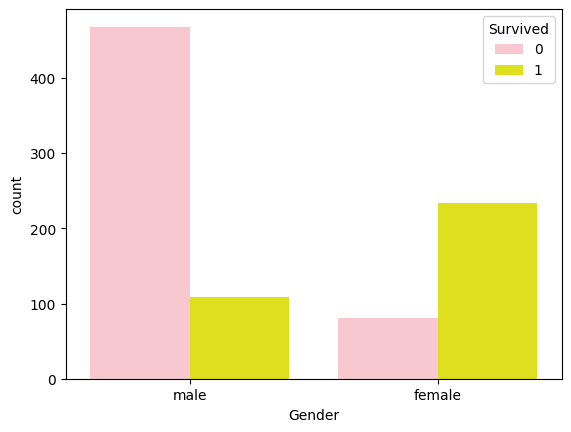

In [36]:
sns.countplot(data=titanic, x='Gender', hue='Survived', palette=['pink','yellow'])
plt.show()

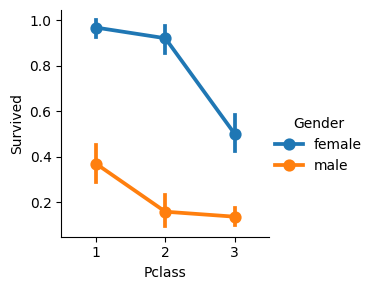

In [ ]:
# 선실등급별, 성별에 따라 생존확률이 높음.
# 두 특성을 한 번에 비교하려면?
sns.catplot(data=titanic, x='Pclass', y='Survived', hue='Gender', kind='point', height=3)
plt.show()

In [52]:
# 나이가 가장 낮은 승객, 가장 높은 승객, 평균 나이 구하기
min_age = titanic.Age.min()
max_age = titanic.Age.max()
mean_Age = titanic.Age.mean()

print(f'{min_age}세')
print(f'{max_age}세')
print(mean_Age)

0.42세
80.0세
29.69911764705882


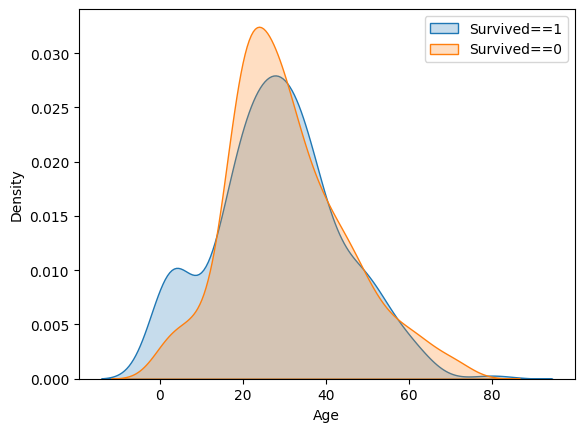

In [62]:
# 나이에 따른 생존밀도
sns.kdeplot(
    data = titanic[titanic.Survived == 1], x='Age', label='Survived==1', fill=True
)
sns.kdeplot(
    data = titanic[titanic.Survived == 0], x='Age', label='Survived==0', fill=True
)

plt.legend(loc='best')